# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
import pandas as pd# Loading all the libraries
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load data

In [2]:
data=pd.read_csv('/datasets/vehicles_us.csv')# Load the data file into a DataFrame



### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
data.info()# print the general/summary information about the DataFrame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
data.head(20)# print a sample of data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


We see issues:
1) missing values in columns:
-model_year
-cylinders
-odometer
-paint_color
-is_4wd
2)type of data in 'date_posted' is 'object', but have to 'date type'.
It is necessary to insert missing data or delete rows with them if their number is minimal and will not affect further analysis. And change the data type to the correct one.

Most missing data in 'is_4wd' column. This is due to the fact that the data type must be boolean. And the values that are read as missing are actually - False. Which means that the car does not have 4wd.

In [5]:
data.duplicated().sum()#check the availability of duplicates

0

### Conclusions and further steps

Let's check what factors affect the price of the car.

## Treat missing values (if any)

In [6]:
for column in data.columns:
    if data[column].isna().sum()!=0:
        print('percente missing data in',column, data[column].isna().sum()/data.shape[0]*100,'%')

percente missing data in model_year 7.023774866569626 %
percente missing data in cylinders 10.208636584182436 %
percente missing data in odometer 15.316836487142163 %
percente missing data in paint_color 17.985443959243085 %
percente missing data in is_4wd 50.36972343522562 %


Number of missing data is not minimal, so we cant delete this rows, it will affect on result of analizing.
Mandatory padding with missing data values.

In [7]:
data['is_4wd'].unique()

array([ 1., nan])

In [8]:
data['is_4wd'].fillna(0)

0        1.0
1        1.0
2        0.0
3        0.0
4        0.0
        ... 
51520    0.0
51521    0.0
51522    0.0
51523    0.0
51524    0.0
Name: is_4wd, Length: 51525, dtype: float64

In [9]:
data[(data['model_year'].isna())&(data['odometer'].isna())].count()

price           549
model_year        0
model           549
condition       549
cylinders       490
fuel            549
odometer          0
transmission    549
type            549
paint_color     452
is_4wd          263
date_posted     549
days_listed     549
dtype: int64

We remove cars that do not have data on mileage and model year from the analysis, because it is impossible to fill in the missing data in them.

In [10]:
data=data[(data['model_year'].isna()&data['odometer'].isna())==False]


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50976 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         50976 non-null  object 
 3   condition     50976 non-null  object 
 4   cylinders     45775 non-null  float64
 5   fuel          50976 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  50976 non-null  object 
 8   type          50976 non-null  object 
 9   paint_color   41806 non-null  object 
 10  is_4wd        25309 non-null  float64
 11  date_posted   50976 non-null  object 
 12  days_listed   50976 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


In [12]:
for column in data.columns:
    if data[column].isna().sum()!=0:
        print('percente missing data in',column, round(data[column].isna().sum()/data.shape[0]*100,2),'%')

percente missing data in model_year 6.02 %
percente missing data in cylinders 10.2 %
percente missing data in odometer 14.4 %
percente missing data in paint_color 17.99 %
percente missing data in is_4wd 50.35 %


In [13]:
data['model_year']=data['model_year'].fillna(data.groupby(['model'])['model_year'].transform('median'))

Replace the missing data in the model year with the averages for each model.

In [14]:
data['paint_color']=data['paint_color'].fillna('unknown')

In [15]:
data['cylinders']=data['cylinders'].fillna(data.model.map(pd.Series(data.groupby(['model'])['cylinders'].median()).to_dict()))

In [16]:
model_year_dict=pd.Series(data.groupby(['model_year'])['odometer'].median()).to_dict()
data['odometer']=data['odometer'].fillna(data.model_year.map(model_year_dict))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         50976 non-null  int64  
 1   model_year    50976 non-null  float64
 2   model         50976 non-null  object 
 3   condition     50976 non-null  object 
 4   cylinders     50976 non-null  float64
 5   fuel          50976 non-null  object 
 6   odometer      50975 non-null  float64
 7   transmission  50976 non-null  object 
 8   type          50976 non-null  object 
 9   paint_color   50976 non-null  object 
 10  is_4wd        25309 non-null  float64
 11  date_posted   50976 non-null  object 
 12  days_listed   50976 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.4+ MB


There is one missing value in the mileage, let's see what kind of car it is

In [18]:
data[data['odometer'].isna()==True]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,NaN,2018-11-18,59


Let's leave the value here for now, in the future this value will disappear, in the process of removing outliers by car age.

## Fix data types

In [19]:
data['date_posted']=pd.to_datetime(data['date_posted'],format='%Y-%m-%d')

In [20]:
data['is_4wd'] = data['is_4wd'].astype('bool')

In [21]:
data['model_year']=data['model_year'].astype('int')

In [22]:
data['cylinders']=data['cylinders'].astype('int')

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         50976 non-null  int64         
 1   model_year    50976 non-null  int64         
 2   model         50976 non-null  object        
 3   condition     50976 non-null  object        
 4   cylinders     50976 non-null  int64         
 5   fuel          50976 non-null  object        
 6   odometer      50975 non-null  float64       
 7   transmission  50976 non-null  object        
 8   type          50976 non-null  object        
 9   paint_color   50976 non-null  object        
 10  is_4wd        50976 non-null  bool          
 11  date_posted   50976 non-null  datetime64[ns]
 12  days_listed   50976 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 5.1+ MB


## Enrich data

In [24]:
# Add datetime values for when the ad was placed
data['week_day_posted']=data['date_posted'].dt.weekday
data['month_posted']=data['date_posted'].dt.month
data['year_posted']=data['date_posted'].dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,True,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,True,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,True,2019-04-02,28,1,4,2019


In [25]:
data['age']=data['year_posted']-data['model_year']# Add the vehicle's age when the ad was placed
data.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day_posted,month_posted,year_posted,age
0,9400,2011,bmw x5,good,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7
1,25500,2011,ford f-150,good,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,True,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,161397.0,automatic,pickup,unknown,True,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,True,2019-04-02,28,1,4,2019,2


In [26]:
def vehicle_mileage_per_year_func(row):
    if row['age']!=0:
        return row['odometer']/row['age'] 
    else: 
        return row['odometer']
data['vehicle_mileage_per_year']=data.apply(vehicle_mileage_per_year_func,axis=1)

In [27]:
# It might help to replace the condition values with something that can be manipulated more easily
data['condition'].unique()
dict={'good':2,'like new':4,'fair':1,'excellent':3,'salvage':0,'new':5}
def replace_condition(row):
    return dict[row]
data['condition']=data['condition'].apply(replace_condition)

print(data.head())


   price  model_year           model  condition  cylinders fuel  odometer  \
0   9400        2011          bmw x5          2          6  gas  145000.0   
1  25500        2011      ford f-150          2          6  gas   88705.0   
2   5500        2013  hyundai sonata          4          4  gas  110000.0   
3   1500        2003      ford f-150          1          8  gas  161397.0   
4  14900        2017    chrysler 200          3          4  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  \
0    automatic     SUV     unknown    True  2018-06-23           19   
1    automatic  pickup       white    True  2018-10-19           50   
2    automatic   sedan         red    True  2019-02-07           79   
3    automatic  pickup     unknown    True  2019-03-22            9   
4    automatic   sedan       black    True  2019-04-02           28   

   week_day_posted  month_posted  year_posted  age  vehicle_mileage_per_year  
0                5             

In [28]:
#ADDED BY REVIEWER

data.describe()

,price,model_year,condition,cylinders,odometer,days_listed,week_day_posted,month_posted,year_posted,age,vehicle_mileage_per_year
count,50976.000000,50976.000000,50976.000000,50976.000000,50975.000000,50976.000000,50976.000000,50976.000000,50976.000000,50976.000000,50975.000000
mean,12130.932243,2009.786723,2.638104,6.120625,115140.146091,39.542628,3.004845,6.629787,2018.307419,8.520696,17741.369668
std,10042.100831,6.125522,0.712582,1.657579,62371.544202,28.197632,1.997683,3.474165,0.461429,6.139136,12504.622993
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,73000.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,10857.142857
50%,9000.000000,2011.000000,3.000000,6.000000,113920.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,15199.500000
75%,16800.000000,2014.000000,3.000000,8.000000,153108.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,21053.159722
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,6.000000,12.000000,2019.000000,110.000000,373200.000000


## Check clean data

In [29]:
# print the general/summary information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50976 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   price                     50976 non-null  int64         
 1   model_year                50976 non-null  int64         
 2   model                     50976 non-null  object        
 3   condition                 50976 non-null  int64         
 4   cylinders                 50976 non-null  int64         
 5   fuel                      50976 non-null  object        
 6   odometer                  50975 non-null  float64       
 7   transmission              50976 non-null  object        
 8   type                      50976 non-null  object        
 9   paint_color               50976 non-null  object        
 10  is_4wd                    50976 non-null  bool          
 11  date_posted               50976 non-null  datetime64[ns]
 12  days_listed       

In [30]:
data.head(10)# print a sample of data



,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,week_day_posted,month_posted,year_posted,age,vehicle_mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,True,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,161397.0,automatic,pickup,unknown,True,2019-03-22,9,4,3,2019,16,10087.312500
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,True,2019-04-02,28,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2,6,2018,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,True,2018-12-27,73,3,12,2018,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,0,1,2019,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,0,7,2018,6,17362.333333
9,9200,2008,honda pilot,3,6,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,4,2,2019,11,13381.000000


## Study core parameters

In order to check the source data for outliers, graph - boxplot is best suited.

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

count     50976.000000
mean      12130.932243
std       10042.100831
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64
line of outliers:  34500.0


(None,
 <AxesSubplot:>,
 (0.0, 40400.0),
 None)

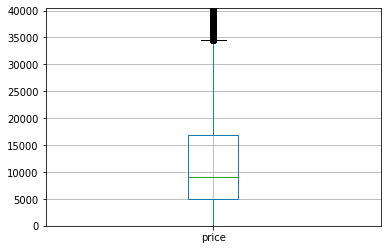

In [31]:
def func(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    return (print(data[column].describe()), data.boxplot(column),plt.hlines(y=[Q1-1.5*IQR], xmin=0.5, xmax=1),plt.ylim(0,Q3+IQR*2),
            print('line of outliers: ',IQR*1.5+Q3))          
func(data,'price')

You can see from the chart that there are a lot of outliers in the price at the top of the chart. We have calculated an upper bound on outliers.

count    50976.000000
mean         8.520696
std          6.139136
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: age, dtype: float64
line of outliers:  24.0


(None,
 <AxesSubplot:>,
 (0.0, 28.0),
 None)

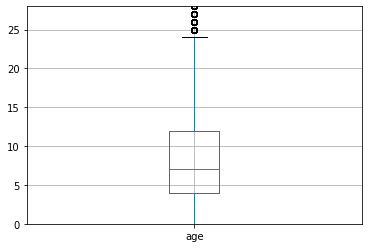

In [32]:
func(data,'age')#

You can see from the chart that there are a lot of outliers in the price at the top of the chart. We have calculated an upper bound on outliers.

count     50975.000000
mean      17741.369668
std       12504.622993
min           0.000000
25%       10857.142857
50%       15199.500000
75%       21053.159722
max      373200.000000
Name: vehicle_mileage_per_year, dtype: float64
line of outliers:  36347.18501984127


(None,
 <AxesSubplot:>,
 (0.0, 41445.193452380954),
 None)

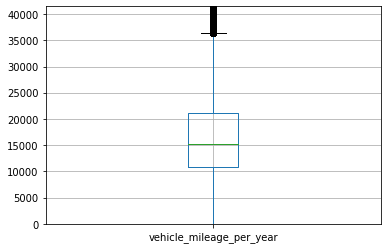

In [33]:
func(data,'vehicle_mileage_per_year')#

You can see from the chart that there are a lot of outliers in the price at the top of the chart. We have calculated an upper bound on outliers.

count    50976.000000
mean         6.120625
std          1.657579
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64
line of outliers:  14.0


(None,
 <AxesSubplot:>,
 (0.0, 16.0),
 None)

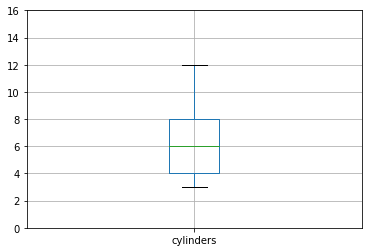

In [34]:
func(data,'cylinders')#

There are no outliers, since the value is categorical.

count    50976.000000
mean         2.638104
std          0.712582
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64
line of outliers:  4.5


(None,
 <AxesSubplot:>,
 (0.0, 5.0),
 None)

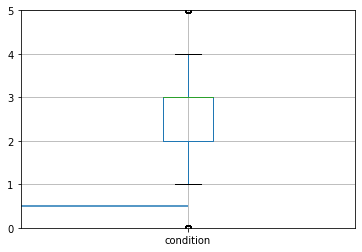

In [35]:
func(data,'condition')#

There are see, that 0 and 5 are outliers.

## Study and treat outliers

According to the graphs, outliers are present only in the mileage and price data. Let's filter the data according to them.

In [36]:
good_data=data.query('(price < 34500)and(vehicle_mileage_per_year < 36347)and(age<24)')# Store data without outliers in a separate DataFrame
print(good_data.head(10))

    price  model_year                     model  condition  cylinders fuel  \
0    9400        2011                    bmw x5          2          6  gas   
1   25500        2011                ford f-150          2          6  gas   
2    5500        2013            hyundai sonata          4          4  gas   
3    1500        2003                ford f-150          1          8  gas   
5   14990        2014              chrysler 300          3          6  gas   
6   12990        2015              toyota camry          3          4  gas   
7   15990        2013               honda pilot          3          6  gas   
8   11500        2012               kia sorento          3          4  gas   
9    9200        2008               honda pilot          3          6  gas   
10  19500        2011  chevrolet silverado 1500          3          8  gas   

    odometer transmission    type paint_color  is_4wd date_posted  \
0   145000.0    automatic     SUV     unknown    True  2018-06-23   
1  

We see that there are abnormally small price values. Let's filter these values.

In [37]:
import numpy as np
print(np.percentile(good_data.price,2))
print(good_data.query('price<399').pivot_table(index='price',values=['days_listed','week_day_posted','model_year']).sort_values('price'))
good_data=good_data.query('price>399')

399.0
       days_listed   model_year  week_day_posted
price                                           
1        38.965714  2015.355714         3.062857
3        22.000000  2005.000000         1.000000
5         5.000000  2011.000000         0.000000
6        53.000000  1999.000000         3.000000
9        12.000000  2010.000000         5.000000
...            ...          ...              ...
351      56.000000  2018.000000         4.500000
371      43.500000  2019.000000         1.500000
372      28.000000  2019.000000         0.000000
384      21.000000  2018.000000         2.000000
388      36.000000  2017.000000         5.000000

[74 rows x 3 columns]


The patterns of these small prices were not found, then we simply delete this part of the data.

## Study core parameters without outliers

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

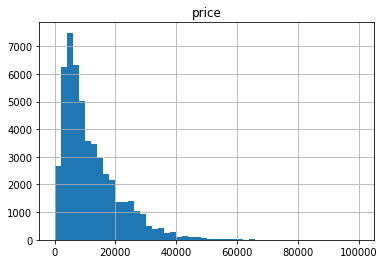

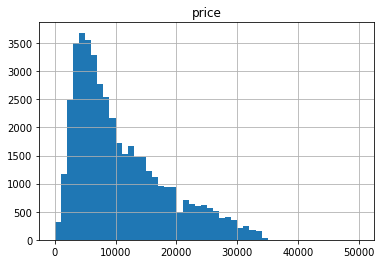

In [38]:
data.hist('price', bins=50, range=(0,100000))
good_data.hist('price', bins=50, range=(0,50000))

array([[<AxesSubplot:title={'center':'vehicle_mileage_per_year'}>]],
      dtype=object)

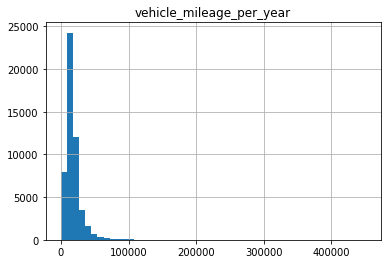

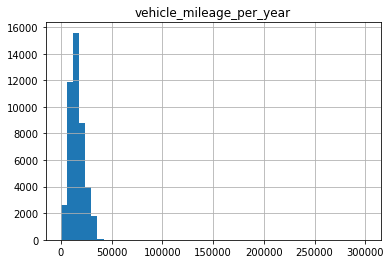

In [39]:
data.hist('vehicle_mileage_per_year', bins=50, range=(0,450000))
good_data.hist('vehicle_mileage_per_year', bins=50, range=(0,300000))

array([[<AxesSubplot:title={'center':'vehicle_mileage_per_year'}>]],
      dtype=object)

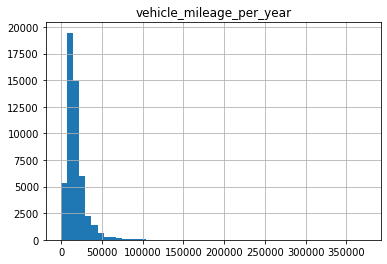

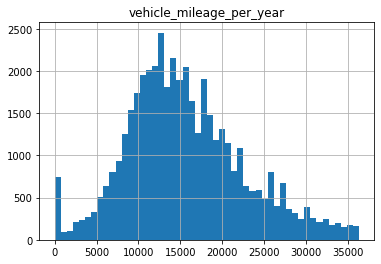

In [40]:
data.hist('vehicle_mileage_per_year', bins=50)
good_data.hist('vehicle_mileage_per_year', bins=50)

After comparing the graphs, we can conclude that the discarded data affected the averages and the analysis, pulling them up. After filtering, data distribution is smoother.

## Ads lifetime

Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

count    44683.000000
mean        39.543495
std         28.244742
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
count    44683.000000
mean        39.543495
std         28.244742
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
line of outliers:  104.0


(None,
 <AxesSubplot:>,
 (0.0, 121.0),
 None)

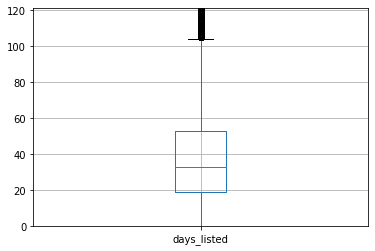

In [41]:
print(good_data['days_listed'].describe())
func(good_data,'days_listed')

According to the schedule, we see that there are advertisements that hung for an abnormally long time, more than 100 days. There are a small number of them, perhaps these are cars, and were not sold on this resource, or were sold on another resource, and here the advertisement hung up to the maximum shelf life.

median:  33.0
0.10294742967123963


array([[<AxesSubplot:title={'center':'days_listed'}>]], dtype=object)

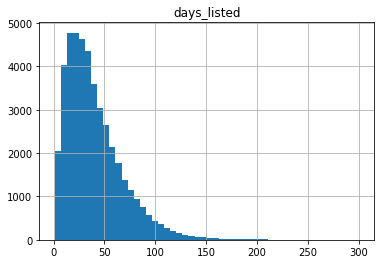

In [42]:
print('median: ',good_data['days_listed'].median())
print(good_data[good_data['days_listed']==0]['days_listed'].count()/good_data.shape[0]*100)#how many advertisements were abnormally short on the site, 0 days,
good_data.hist('days_listed', bins=50,range=(1,300))

We counted how many advertisements were on the site abnormally little, 0 days, perhaps they were deleted immediately after publication due to a technical error or the cars were bought on the day of publication. In any case, their number is less than 1 percent, so they will not affect the result of the analysis.

## Average price per each type of vehicle

Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [43]:
good_data_group=good_data.pivot_table(index='type', values='price', aggfunc=['count','mean'])
good_data_group.columns=['number_of_ads','average_price']
print(good_data_group.sort_values('number_of_ads',ascending=False).head(10))

             number_of_ads  average_price
type                                     
sedan                11007    6860.282275
SUV                  10982   10286.259607
truck                10159   14874.060931
pickup                5976   14523.107932
coupe                 1864   13673.156652
wagon                 1449    8740.924776
mini-van              1062    7632.832392
hatchback              936    6739.293803
van                    521    8698.992322
convertible            316   13104.784810


<AxesSubplot:xlabel='type'>

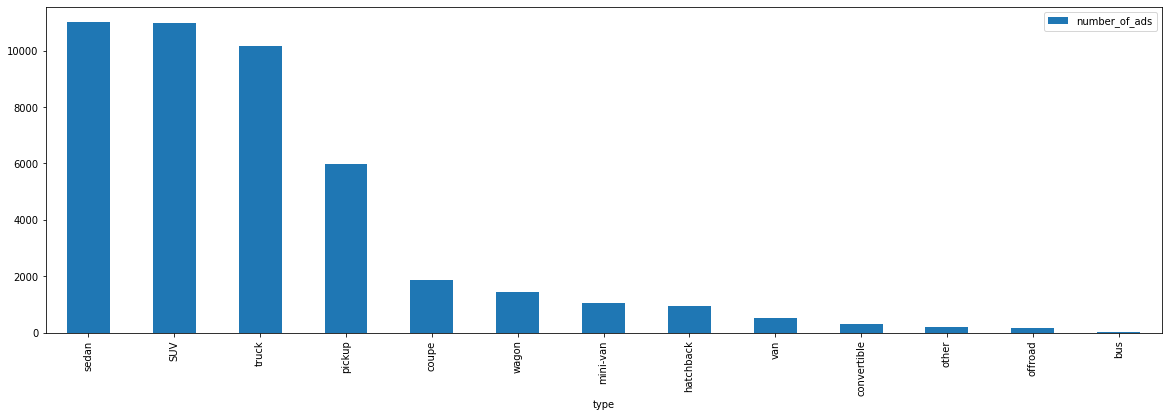

In [44]:
good_data_group.sort_values('number_of_ads',ascending=False).plot(y='number_of_ads', kind='bar',figsize=(20, 6))

We see that most ads are for sedan ,SUV.

## Price factors

                               age  odometer     price  \
age                       1.000000  0.625156 -0.672181   
odometer                  0.625156  1.000000 -0.628343   
price                    -0.672181 -0.628343  1.000000   
vehicle_mileage_per_year -0.512076  0.198907  0.185996   

                          vehicle_mileage_per_year  
age                                      -0.512076  
odometer                                  0.198907  
price                                     0.185996  
vehicle_mileage_per_year                  1.000000  


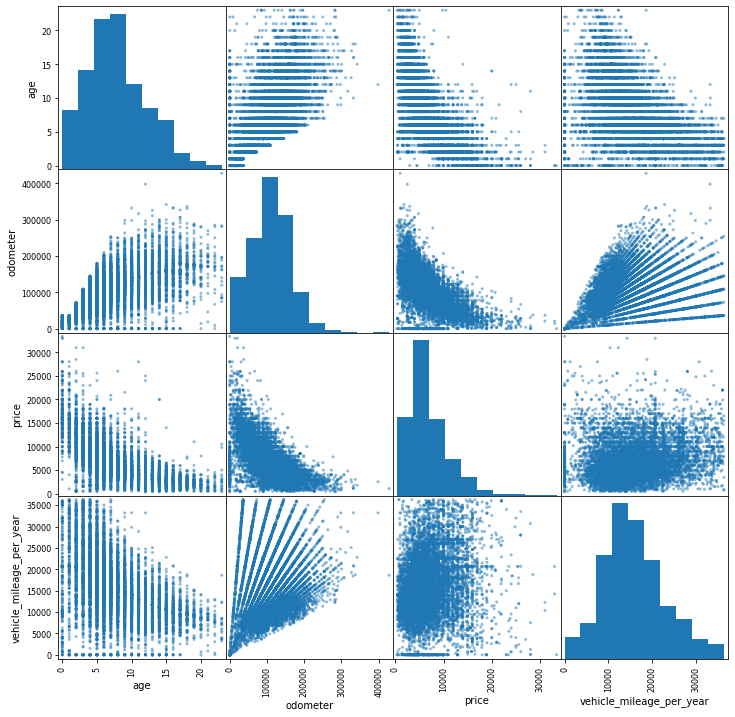

In [45]:
good_data['id']=range(len(good_data))
good_data_sedan1=good_data.query('type=="sedan"').pivot_table(index='id',values=['price','age','odometer','vehicle_mileage_per_year'])
pd.plotting.scatter_matrix(good_data_sedan1,figsize=(12,12))
print(good_data_sedan1.corr())

Let's look at the dependence of the price on age, total mileage of the car and the average annual. As expected, the distribution is quite uniform, the dependence is inversely proportional. Although there are ads that fall out of the general trend. This is also indicated by the correlation coefficient, it is negative, close to -1. The dependence on the average annual mileage is not obvious. The correlation coefficient is close to 0, that is, we can conclude that the price does not depend on the average annual mileage of the car.

automatic    10394
manual         548
other           65
Name: transmission, dtype: int64


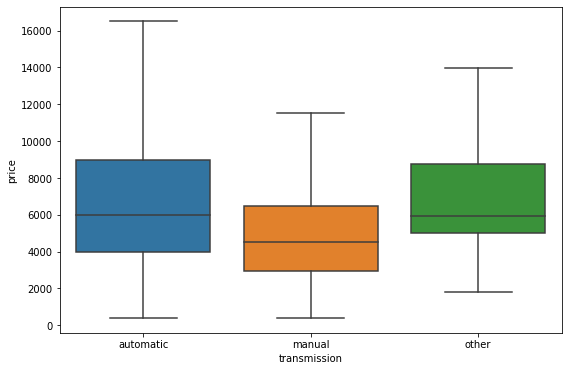

In [46]:
good_data_sedan2=good_data.query('type=="sedan"')
print(good_data_sedan2['transmission'].value_counts())
plt.figure(figsize=(9,6))
ax=sns.boxplot(x='transmission',y='price',data=good_data_sedan2, showfliers=False)

We see that the prices of cars with an automatic transmission are higher than with a manual one.

unknown    1987
silver     1862
black      1591
grey       1474
white      1349
blue       1134
red         863
custom      248
brown       245
green       199
purple       25
yellow       21
orange        9
Name: paint_color, dtype: int64


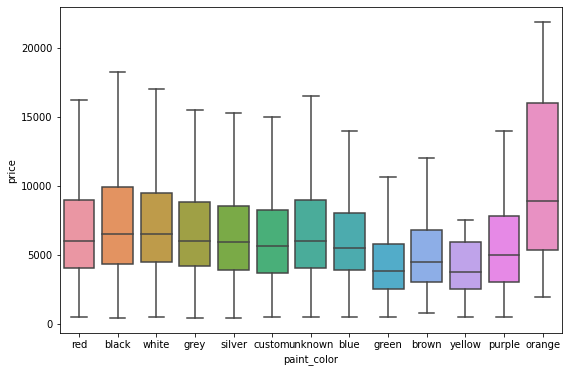

In [47]:
print(good_data_sedan2['paint_color'].value_counts())#check the number of elements for a condition greater than 50
plt.figure(figsize=(9,6))
ax=sns.boxplot(x='paint_color',y='price',data=good_data_sedan2, showfliers=False)

We see that the highest average prices are for white and black cars, and the lowest for green cars, however, the difference is small. (yellow, purple, orange - excluded, since there are less than 50 of them)

3    5468
2    4037
4    1146
1     281
0      38
5      37
Name: condition, dtype: int64


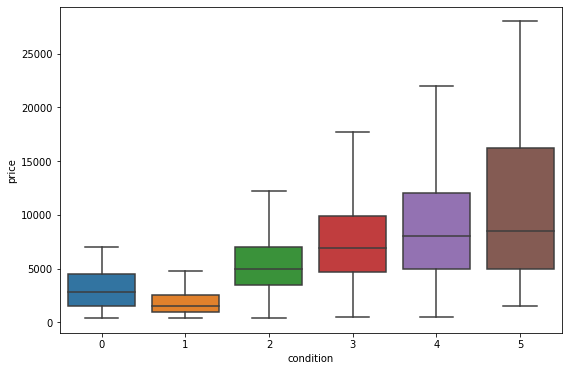

In [48]:
print(good_data_sedan2['condition'].value_counts())#check the number of elements for a condition greater than 50
plt.figure(figsize=(9,6))
ax=sns.boxplot(x='condition',y='price',data=good_data_sedan2, showfliers=False)

It can be seen that the price is directly proportional to the conditions. The better the conditions, the higher the price.(0, 5- since there are less than 50 of them)

                               age  odometer     price  \
age                       1.000000  0.623722 -0.646811   
odometer                  0.623722  1.000000 -0.606391   
price                    -0.646811 -0.606391  1.000000   
vehicle_mileage_per_year -0.585699  0.122861  0.245730   

                          vehicle_mileage_per_year  
age                                      -0.585699  
odometer                                  0.122861  
price                                     0.245730  
vehicle_mileage_per_year                  1.000000  


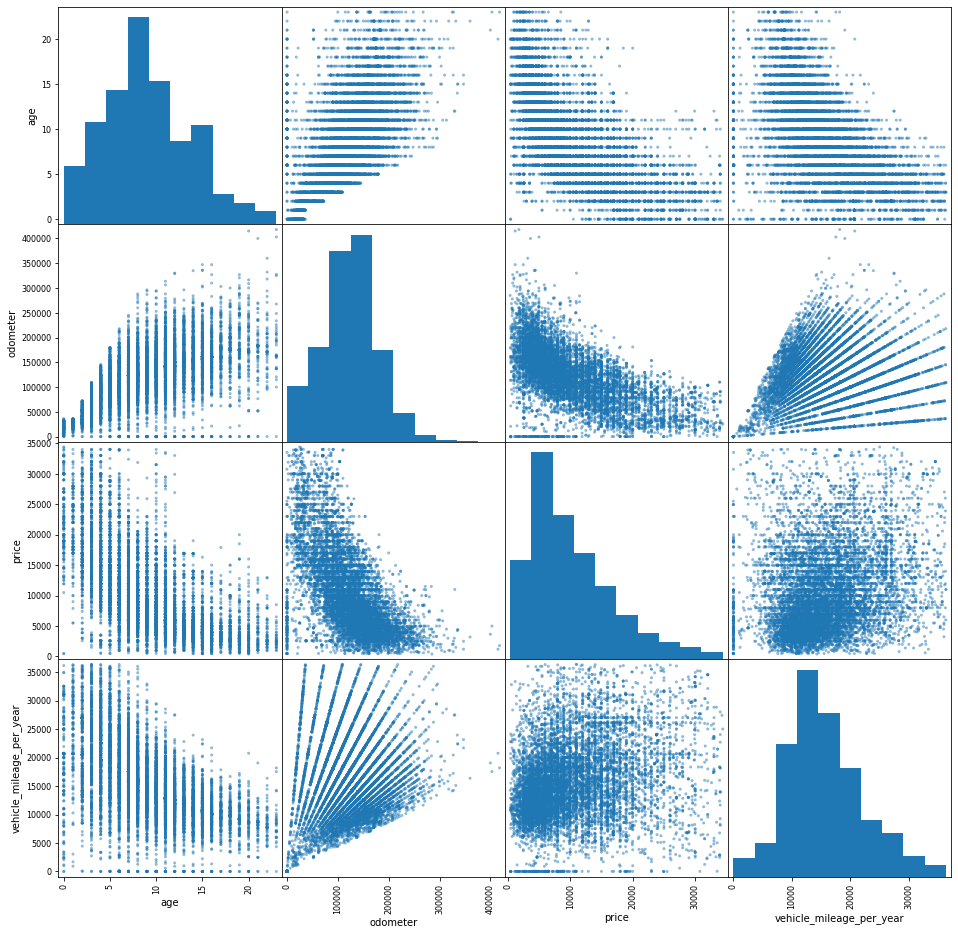

In [49]:
good_data_SUV1=good_data.query('type=="SUV"').pivot_table(index='id',values=['price','age','odometer','vehicle_mileage_per_year'])
pd.plotting.scatter_matrix(good_data_SUV1,figsize=(16,16))
print(good_data_SUV1.corr())

The second car can see the same dependencies.
Age and mileage are inversely related.
The price does not depend on the average mileage.

automatic    10435
manual         455
other           92
Name: transmission, dtype: int64


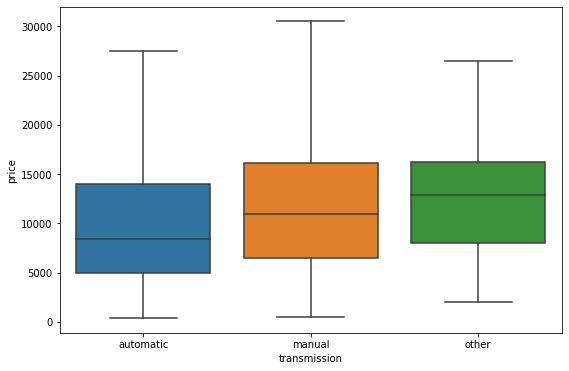

In [50]:
good_data_SUV2=good_data.query('type=="SUV"')
print(good_data_SUV2['transmission'].value_counts())
plt.figure(figsize=(9,6))
ax=sns.boxplot(x='transmission',y='price',data=good_data_SUV2, showfliers=False)

In this category of cars, with a manual transmission, cars are slightly more expensive on average.

unknown    1959
black      1893
white      1712
silver     1407
grey       1066
blue        938
red         827
green       411
brown       349
custom      267
orange       73
yellow       43
purple       37
Name: paint_color, dtype: int64


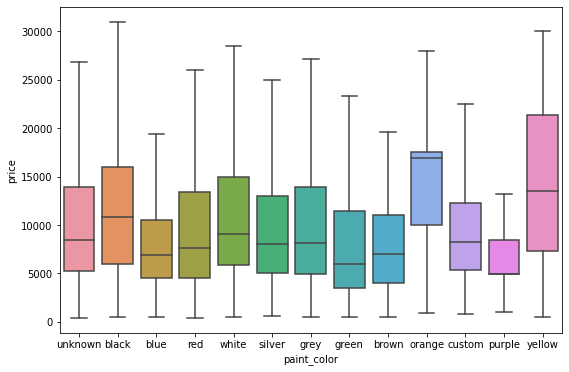

In [51]:
print(good_data_SUV2['paint_color'].value_counts())#check the number of elements for a condition greater than 50
plt.figure(figsize=(9,6))
ax=sns.boxplot(x='paint_color',y='price',data=good_data_SUV2, showfliers=False)

We see that orange cars have unexpectedly the highest average prices, however, due to their small percentage in the total number of cars, it should not be concluded that this pattern is applicable to other databases. And black cars are expected to have a higher average price. (Yellow, purple are excluded, since there are less than 50 of them)

3    5671
2    4015
4     967
1     297
0      17
5      15
Name: condition, dtype: int64


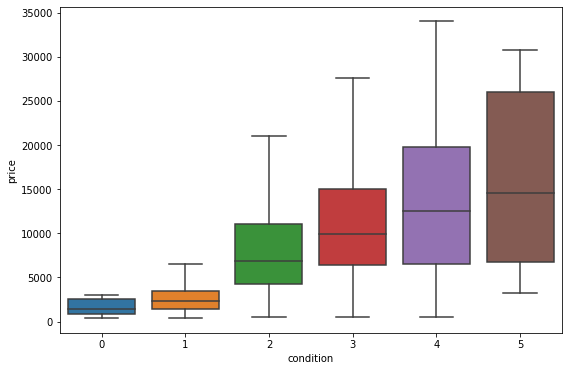

In [52]:
print(good_data_SUV2['condition'].value_counts())#check the number of elements for a condition greater than 50
plt.figure(figsize=(9,6))
ax=sns.boxplot(x='condition',y='price',data=good_data_SUV2, showfliers=False)

It can be seen that the price is directly proportional to the conditions. The better the conditions, the higher the price.(0, 5- since there are less than 50 of them)

## General conclusion

To determine the factors affecting the price of a used car, it was necessary to process the provided data, including deleting or filling in missing values, checking for duplicates: <br>
1) In the case where there is no data on the model year and mileage, we had to remove ads, since these are two main indicators, and it makes no sense to include ads in the analysis where they are both missing. Fortunately, there were few such announcements, and we lost only a small part of the data.<br>
2) The ad, where only the model year is missing, we filled in the median values of the model year, in accordance with the car model.<br>
3) In the case of mileage, we filled in the missing values, with median values, according to the age of these cars.<br>
The analysis also removed outliers by car age, as for some very old cars, there will already be other patterns in price that cannot be compared to typical middle-aged cars. They need to be sorted into a separate group - rare cars). There were also outliers in value, which could also appear due to the presence of rare, non-standard cars. Also, according to the period of placement of the ad, possibly related to technical problems on the site.<br>

After analyzing the cleaned and processed data, we can conclude that the cost of a car is primarily affected by age and mileage, the higher they are, the lower the cost. Also the condition raises the price of the car. The better the condition, the higher the price.
The average mileage of the car does not affect the price.
The price doesn't really affect the cost either. However, it can be noted that black cars are slightly more expensive on average.